## Содержание
1. [Получение данных](#read_data)
2. [Изучение и подготовка данных](#data_processing)
3. [Исследовательский анализ данных](#analysis)
4. [Портрет пользователя каждого региона (NA, EU, JP)](#region_research)
5. [Проверка гипотез](#hypothesis_testing)
6. [Общий вывод](#conclusion)

# Определение успешности компьютерных игр

Исследование проводится для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Имея данные до 2016 года, необходимо спланировать кампанию на 2017-й и отработать принцип работы с данными.

**Цель исследования:** выявить определяющие успешность игры закономерности.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    
    Расшифровка рейтинга ESRB:
    «E» («Everyone») — «Для всех»
    «T» («Teen») — «Подросткам 13—19 лет»
    «M» («Mature») — «От 17 лет»
    «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
    «EC» («Early childhood») — «Для детей младшего возраста»
    «K-A» («for Kids to Adults») - «Для детей – для тех, кто уже научился говорить и держать джойстик» (позже в 1998 году был переименован в Е)
    «RP» ( «Rating Pending»») — «Рейтинг ожидается»
    «AO» («Adults Only 18+») — «Только для взрослых»

    

# Шаг 1. Получение данных
<a name='read_data'></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')

# Шаг 2. Изучение и подготовка данных
<a name='data_processing'></a>

Изучим таблицу с информацией, типы данных и проверим наличие пропусков:

In [3]:
display(data.head(3))

data.info()

display(data.describe().T)

print(data.isna().sum())

round(data.isna().sum() * 100 / len(data), 2)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

Проверим таблицу на наличие дубликатов:

In [4]:
data.duplicated().sum()

0

*Выявленные ошибки:*

   - некорректный формат в названиях колонок - нужно привести к нижнему регистру.
   - тип данных в колонке Year_of_Release - вещественные числа, необходимо привести их к целочисленному виду. В User_Score - строки - привести к вещественному числу.
   - пропуски в колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

Изменим формат в названиях колонок на корректный:

In [5]:
data.columns = data.columns.str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Обработаем пропуски.

Пропуски в столбце year_of_release могут быть случайными, заменим их на "1", чтобы они не пересекались с другими датами и не нарушали статистику.

In [6]:
data['year_of_release'].fillna(1, inplace=True)
data.query('year_of_release =="1"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,1.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,1.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,1.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,1.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,1.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,1.0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,1.0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,1.0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,1.0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В колонках name и genre всего по 2 пропуска, восстановить их не представляется возможным, и исследованию эти строки не помогут, поэтому их можно удалить. Они могут быть следствием технической ошибки.

In [7]:
data.dropna(subset = ['name', 'genre'], inplace = True)
data['name'].isna().sum()

0

In [8]:
data['genre'].isna().sum()

0

В столбце user_score помимо пропусков встречается аббревиатура "tbd" - "подлежит определению". Вероятно, эти игры пока не оценили. Чтобы можно было перевести тип данных в целое число, надо чем-то заменить пропуски и "tbd", но не нулями, т.к. такой рейтинг уже имеется. Возьмем значение 11, т.к. максимальная оценка - 10. Также нужно заполнить пропуски в столбце critic_score. Возьмем значение 101, т.к. максимальная оценка - 100.

In [9]:
data['user_score'].value_counts().head(3)

tbd    2424
7.8     324
8       290
Name: user_score, dtype: int64

In [10]:
data.query('user_score =="0"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


In [11]:
data['user_score'].fillna(11, inplace=True)
data['critic_score'].fillna(101, inplace=True)

data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

In [12]:
data['user_score'] = data['user_score'].replace('tbd', '11')
data.query('user_score =="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
data.query('user_score =="11"').head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,101.0,11,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,11,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,101.0,11,T


Посмотрим уникальные значения в столбце rating. Вероятно, он также определен не на все игры. Заменим пропуски на pending.

In [14]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [15]:
data['rating'].fillna('pending', inplace=True)

data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,101.0,11,pending


In [16]:
data['rating'].isna().sum()

0

Преобразуем тип данных в колонках year_of_release и user_score.

In [17]:
data['year_of_release'] = np.int32(data['year_of_release'])
data['user_score'] = data['user_score'].astype('float')

display(data.head(3))
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,pending
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int32
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales:

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,101.0,11.0,pending,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,101.0,11.0,pending,31.38


Данные готовы к работе: приведены к нужному типу, там где это необходимо, пропуски заполнены, либо удалены. Также создан отдельный столбец с суммарными продажами по всех регионам. Можно приступать к исследованию.

# Шаг 3. Исследовательский анализ данных
<a name='analysis'></a>

**Посмотрим, сколько игр выпускалось в разные годы.** Для этого используем сводную таблицу и столбчатую диаграмму.

Text(0, 0.5, 'quantity')

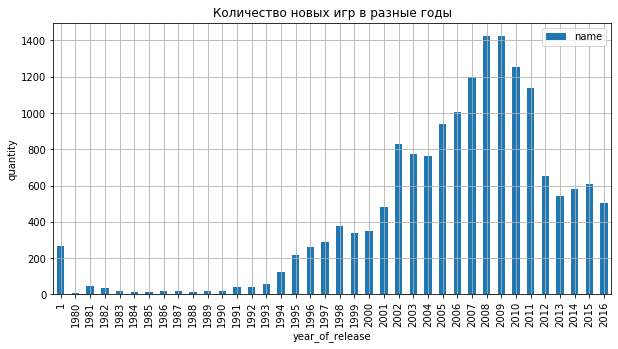

In [19]:
(
data.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(10, 5), title='Количество новых игр в разные годы')
)
plt.ylabel('quantity')

**Вывод:** за период с 1980 по 2016 больше всего игр выпускалось с 2002 (резкий скачок) до 2012 (резкий спад). Активный рост начался с 1994 года. Самые пиковые годы выпуска игр приходятся на 2008-2009 гг.

Для построения прогнозов на будущее важны данные за период взлета продаж и по 2016 год.

**Посмотрим, как менялись продажи по платформам.** Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выявим, за какой характерный срок появляются новые и исчезают старые платформы.

Прежде определим платформы с наибольшими суммарными продажами с помощью сводной таблицы:

In [20]:
top_platforms_pivot_table = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc=['sum'])

top_platforms_pivot_table.columns = ['total_sales']

display(top_platforms_pivot_table.sort_values(by='total_sales', ascending = False).head())

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Возьмем для анализа первые три (PS2, X360, PS3), сделаем выборку по каждому и построим гистограммы.

**PS2:**

In [21]:
ps2 = data.query('platform == "PS2"')
ps2.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15


Text(0, 0.5, 'quantity')

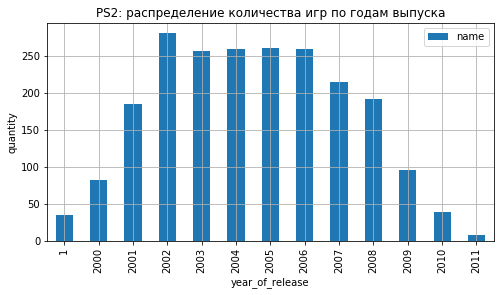

In [22]:
(
ps2.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(8, 4), title='PS2: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**X360:**

In [23]:
x360 = data.query('platform == "X360"')
x360.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


Text(0, 0.5, 'quantity')

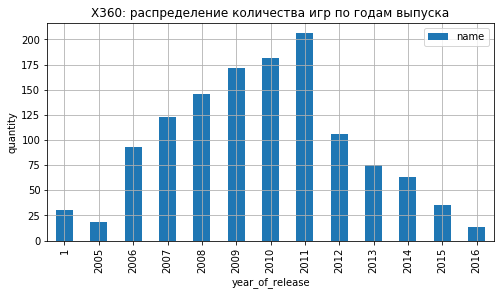

In [24]:
(
x360.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(8, 4), title='X360: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**PS3:**

In [25]:
ps3 = data.query('platform == "PS3"')
ps3.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Text(0, 0.5, 'quantity')

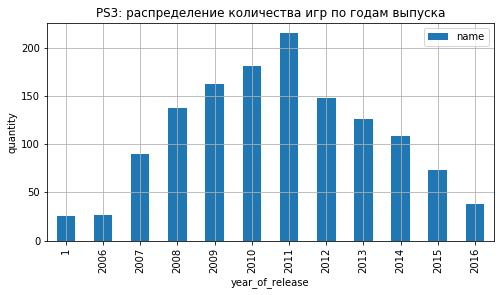

In [26]:
(
ps3.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(8, 4), title='PS3: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** судя по графикам, платформы появляются и исчезают за срок примерно в 10 лет.

Возьмем данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.

Пусть это будет **период с 2014 по 2016 год.**

In [27]:
actual_data = data.query('year_of_release >= 2014')
actual_data.head(7)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,pending,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,101.0,11.0,pending,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,101.0,11.0,pending,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60


**Какие платформы лидируют по продажам, растут или падают?** Выберем несколько потенциально прибыльных платформ.

In [28]:
actual_top_pivot_table = actual_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc=['sum'])

actual_top_pivot_table.columns = ['total_sales']

display(actual_top_pivot_table.sort_values(by='total_sales', ascending = False).head(10))

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


По результатам, платформы с самыми большими сборами за период с 2014 по 2016: PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV.

Графики для платформ X360 и PS3 мы уже строили, они все еще в списке, хотя там наблюдается спад продаж. А PS2 в выборку уже не попадает.

Построим гистограммы для других платформ.

**PS4:**

In [29]:
actual_ps4 = actual_data.query('platform == "PS4"')
actual_ps4.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,pending,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Text(0, 0.5, 'quantity')

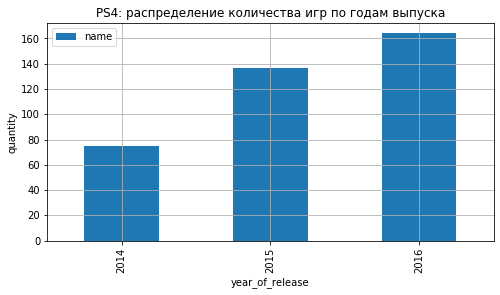

In [30]:
(
actual_ps4.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(8, 4), title='PS4: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** согласно графику, продажи PS4 стали "набирать обороты".

Рассмотрим **3DS:**

In [31]:
actual_3ds = actual_data.query('platform == "3DS"')
actual_3ds.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,101.0,11.0,pending,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,101.0,11.0,pending,7.55


Text(0, 0.5, 'quantity')

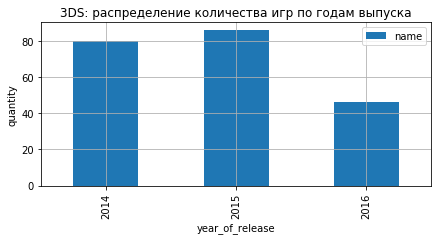

In [32]:
(
actual_3ds.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(7, 3), title='3DS: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** продажи 3DS снизились в 2016 году.

**XOne:**

In [33]:
actual_xone = actual_data.query('platform == "XOne"')
actual_xone.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,101.0,11.0,pending,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47


Text(0, 0.5, 'quantity')

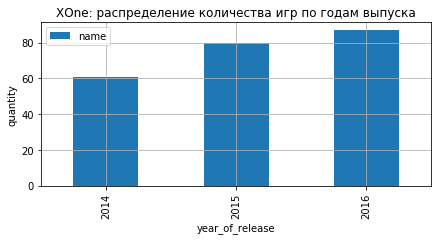

In [34]:
(
actual_xone.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(7, 3), title='XOne: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** а продажи XOne увеличиваются!

**PC:**

In [35]:
actual_pc = actual_data.query('platform == "PC"')
actual_pc.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28


Text(0, 0.5, 'quantity')

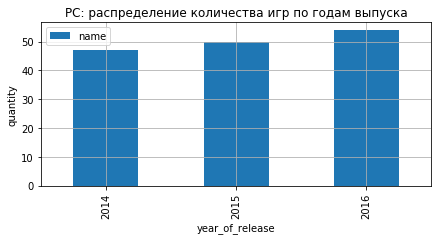

In [36]:
(
actual_pc.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(7, 3), title='PC: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** у PC продажи идут довольно ровно вверх.

**WiiU:**

In [37]:
actual_wiiu = actual_data.query('platform == "WiiU"')
actual_wiiu.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,101.0,11.0,pending,4.87


Text(0, 0.5, 'quantity')

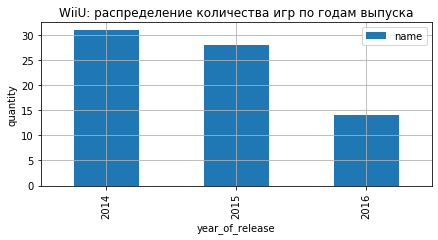

In [38]:
(
actual_wiiu.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(7, 3), title='WiiU: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** продажи WiiU резко снижаются.

**PSV:**

In [39]:
actual_psv = actual_data.query('platform == "PSV"')
actual_psv.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
868,Minecraft,PSV,2014,Misc,0.18,0.64,0.90,0.24,101.0,11.0,pending,1.96
3086,Freedom Wars,PSV,2014,Role-Playing,0.15,0.10,0.32,0.08,73.0,8.3,T,0.65


Text(0, 0.5, 'quantity')

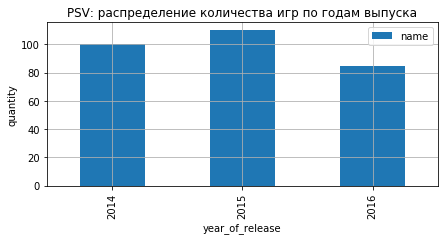

In [40]:
(
actual_psv.pivot_table(index='year_of_release', values='name', aggfunc='count')
.sort_values(by='year_of_release')
.plot(kind='bar', grid=True, figsize=(7, 3), title='PSV: распределение количества игр по годам выпуска')
)
plt.ylabel('quantity')

**Вывод:** у PSV взлет был в 2015, а затем продажи начали снижаться.

**Итоги:**

Исходя из гистограмм, **потенциально прибыльные платформы - PS4, 3DS, XOne, PC.**

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

Для начала сделаем выборку profitable_platforms из потенциально прибыльных платформ за 2014-2016 гг. методом isin():

In [41]:
profitable_platforms = actual_data[actual_data['platform'].isin(('PS4', '3DS', 'XOne', 'PC'))]
profitable_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,101.0,11.0,pending,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,101.0,11.0,pending,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,101.0,11.0,pending,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,101.0,11.0,pending,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,101.0,11.0,pending,7.39
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


Построим диаграмму размаха и выведем числовое описание данных:

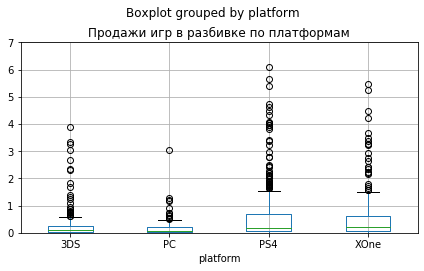

In [42]:
profitable_platforms.boxplot('total_sales', by='platform')
plt.ylim(0, 7)
plt.title('Продажи игр в разбивке по платформам')
plt.tight_layout(rect=[0, 0.05, 1, 0.95])

Масштабируем график для наглядности:

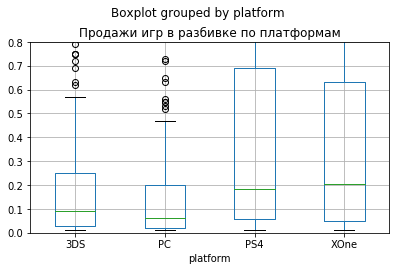

In [43]:
profitable_platforms.boxplot('total_sales', by='platform')
plt.ylim(0, 0.8)
plt.title('Продажи игр в разбивке по платформам')
plt.tight_layout(pad=2.5)

In [44]:
profitable_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


**Вывод:** медианные значения сильно отличаются от средних, и есть выбросы, что говорит о том, что какие-то отдельные игры продавались чаще других. Это особенно заметно по графикам у PS4 и XOne.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?** Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Рассмотрим платформу с самыми большими продажами - **PS4.**

*Оценка критиков:*

0.40190287811475334

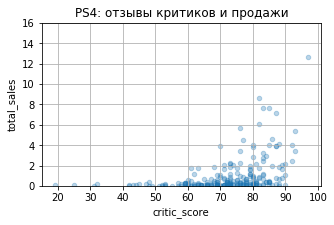

In [45]:
actual_ps4 = actual_ps4.query('critic_score < 101 and user_score < 11')

actual_ps4.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 16), figsize=(5, 3), grid=True, alpha=0.3, title='PS4: отзывы критиков и продажи')

actual_ps4['critic_score'].corr(actual_ps4['total_sales'])

**Вывод:** корреляция слабая, на графике оценка критиков почти доходит до максимальных значений, и чем она выше, тем больше продаж, но в основном отдельных игр.

*Оценка пользователей:*

-0.04318585997193634

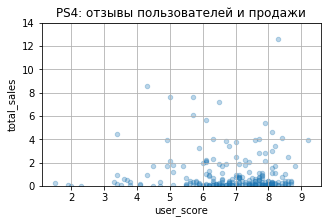

In [46]:
actual_ps4.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 14), figsize=(5, 3), grid=True, alpha=0.3, title='PS4: отзывы пользователей и продажи')

actual_ps4['user_score'].corr(actual_ps4['total_sales'])

**Вывод:** корреляция слабая, на графике оценка пользователей тоже почти доходит до максимальных значений, и она также больше влияет на продажи отдельных игр.

**3DS:**

*Оценка критиков:*

0.28468579095782925

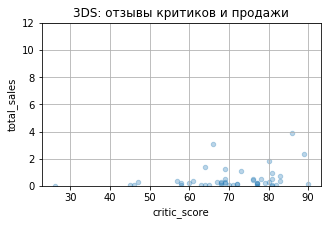

In [47]:
actual_3ds = actual_3ds.query('critic_score < 101 and user_score < 11')

actual_3ds.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 12), figsize=(5, 3), grid=True, alpha=0.3, title='3DS: отзывы критиков и продажи')

actual_3ds['critic_score'].corr(actual_3ds['total_sales'])

*Оценка пользователей:*

0.2798498792503281

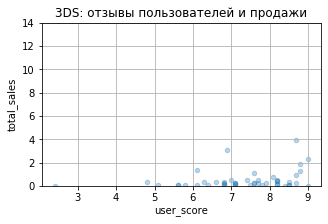

In [48]:
actual_3ds.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 14), figsize=(5, 3), grid=True, alpha=0.3, title='3DS: отзывы пользователей и продажи')

actual_3ds['user_score'].corr(actual_3ds['total_sales'])

**Вывод:** среди оценок критиков и пользователей больше положительных. А корреляция везде слабая.

**XOne:**

*Оценка критиков:*

0.42211185105557647

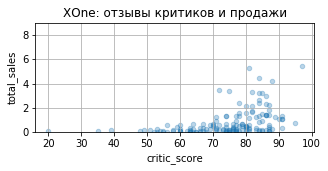

In [49]:
actual_xone = actual_xone.query('critic_score < 101 and user_score < 11')

actual_xone.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 2), grid=True, alpha=0.3, title='XOne: отзывы критиков и продажи')

actual_xone['critic_score'].corr(actual_xone['total_sales'])

*Оценка пользователей:*

-0.0917343450331075

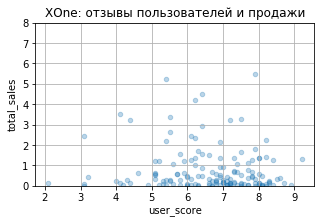

In [50]:
actual_xone.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 8), figsize=(5, 3), grid=True, alpha=0.3, title='XOne: отзывы пользователей и продажи')

actual_xone['user_score'].corr(actual_xone['total_sales'])

**Вывод:** много положительных отзывов критиков и пользователей. Но снова это больше влияет на продажи отдельных игр.

**PC:**

*Оценка критиков:*

0.17206091490145103

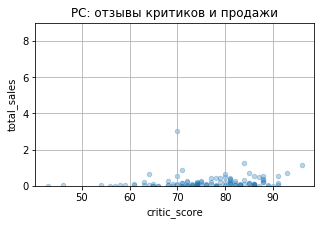

In [51]:
actual_pc = actual_pc.query('critic_score < 101 and user_score < 11')

actual_pc.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='PC: отзывы критиков и продажи')

actual_pc['critic_score'].corr(actual_pc['total_sales'])

*Оценка пользователей:*

-0.08997391228554938

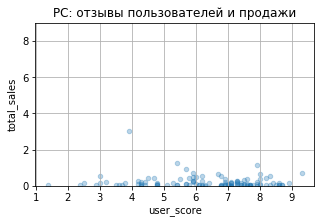

In [52]:
actual_pc.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='PC: отзывы пользователей и продажи')

actual_pc['user_score'].corr(actual_pc['total_sales'])

**Вывод:** корреляция слабая. Среди положительных больше отзывов критиков.

**Соотнесем выводы с продажами игр на других платформах.**

Возьмем платфорны, которые уже не так популярны - PS3 и WiiU.


**PS3:**

*Оценка критиков:*

0.44657460493190704

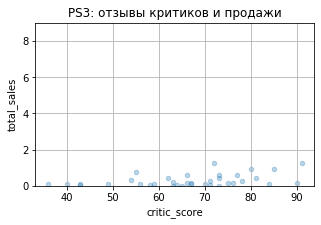

In [53]:
actual_ps3 = actual_data.query('platform == "PS3"')

actual_ps3 = actual_ps3.query('critic_score < 101 and user_score < 11')

actual_ps3.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='PS3: отзывы критиков и продажи')

actual_ps3['critic_score'].corr(actual_ps3['total_sales'])

*Оценка пользователей:*

0.15659516181359956

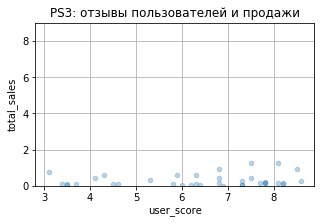

In [54]:
actual_ps3.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='PS3: отзывы пользователей и продажи')

actual_ps3['user_score'].corr(actual_ps3['total_sales'])

**Вывод:** корреляция также слабая, отзывов мало, и они тоже больше влияют на продажи определенных игр.

**WiiU:**

*Оценка критиков:*

0.3756402218389979

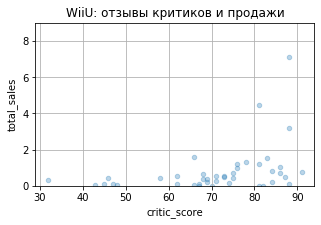

In [55]:
actual_wiiu = actual_data.query('platform == "WiiU"')

actual_wiiu = actual_wiiu.query('critic_score < 101 and user_score < 11')

actual_wiiu.plot(x='critic_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='WiiU: отзывы критиков и продажи')

actual_wiiu['critic_score'].corr(actual_wiiu['total_sales'])

*Оценка пользователей:*

0.4114513876908575

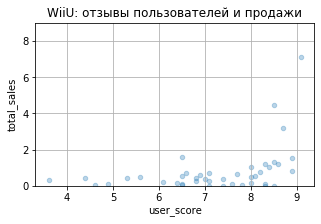

In [56]:
actual_wiiu.plot(x='user_score', y='total_sales', kind='scatter', ylim=(0, 9), figsize=(5, 3), grid=True, alpha=0.3, title='WiiU: отзывы пользователей и продажи')

actual_wiiu['user_score'].corr(actual_wiiu['total_sales'])

**Вывод:** тоже слабая корреляция. У этой платформы отзывов тоже меньше.

**Итоги:** у более прибыльных платформ больше продаж отдельных игр. Также по диаграммам рассеяния видно, что чем выше оценки критиков, тем больше продаж на этих платформах, но мы не можем утверждать, что именно это является причиной.

**Посмотрим на общее распределение игр по ЖАНРАМ. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Прежде изучим подборку за 2014-2016 гг.:

Text(0, 0.5, 'quantity')

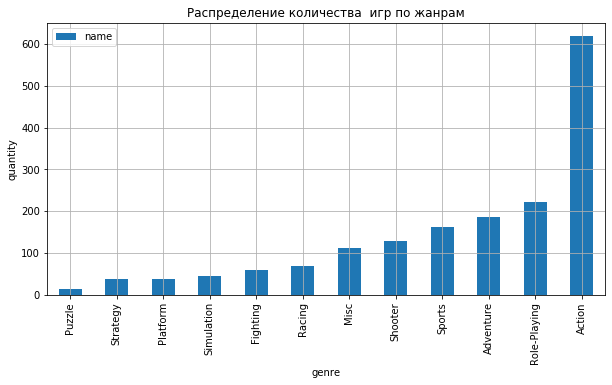

In [57]:
(
actual_data.pivot_table(index='genre', values='name', aggfunc='count')
.sort_values(by='name')
.plot(kind='bar', grid=True, figsize=(10, 5), title='Распределение количества  игр по жанрам')
)
plt.ylabel('quantity')

**Наиболее часто встречающиеся жанры:** Action, Role-Playing, Adventure, Sports, Shooter, Misc.

Какие из них **наиболее прибыльные?**

Рассчитаем средние продажи:

In [58]:
genres_pivot_table = actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc=['mean'])

genres_pivot_table.columns = ['total_sales']

display(genres_pivot_table.sort_values(by='total_sales', ascending = False).head(7))

,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301


**Наиболее прибыльные жанры:** Shooter, Sports, Platform, Fighting, Role-Playing.

**Наименее прибыльные:**

In [59]:
display(genres_pivot_table.sort_values(by='total_sales').head(7))

,total_sales
genre,
Adventure,0.094865
Strategy,0.107027
Puzzle,0.157857
Simulation,0.298409
Action,0.322068
Misc,0.332301
Racing,0.398841


**Наименее прибыльные жанры:** Adventure, Strategy, Puzzle, Simulation.

Определим, какие жанры выделяются на наиболее прибыльных платформах:

Text(0, 0.5, 'quantity')

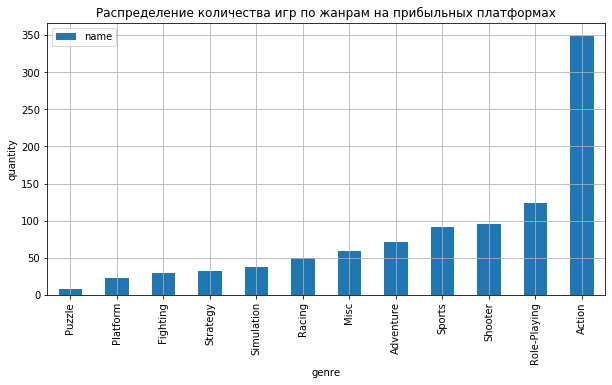

In [60]:
(
profitable_platforms.pivot_table(index='genre', values='name', aggfunc='count')
.sort_values(by='name')
.plot(kind='bar', grid=True, figsize=(10, 5), title='Распределение количества игр по жанрам на прибыльных платформах')
)
plt.ylabel('quantity')

**Наиболее часто встречающиеся жанры на популярных платформах:** Action, Role-Playing, Shooter, Sports, Adventure, Misc. Это схоже с общей выборкой.

Определим, какие из них **наиболее прибыльные** (рассмотрим средние значения продаж):

In [61]:
top_genres_pivot_table = profitable_platforms.pivot_table(index = 'genre', values = 'total_sales', aggfunc=['mean'])

top_genres_pivot_table.columns = ['total_sales']

display(top_genres_pivot_table.sort_values(by='total_sales', ascending = False).head(7))

,total_sales
genre,
Shooter,1.469895
Sports,0.825435
Role-Playing,0.680887
Fighting,0.624138
Platform,0.458182
Action,0.430029
Racing,0.361020


**Наиболее прибыльные жанры на популярных платформах:** Shooter, Sports, Role-Playing, Fighting, Platform, Action. В отличие от общей выборки, сюда входит Action.

Определим наименее прибыльные жанры на популярных платформах:

In [62]:
display(top_genres_pivot_table.sort_values(by='total_sales').head(7))

,total_sales
genre,
Puzzle,0.111250
Strategy,0.116250
Adventure,0.154648
Misc,0.312034
Simulation,0.331892
Racing,0.361020
Action,0.430029


**Наименее прибыльные жанры на популярных платформах:** Puzzle, Strategy, Adventure. Эти жанры встречаются и в общей выборке.

**Итоги:**

И из общей подборки, и на популярных платформах:

- наиболее часто встречающиеся жанры: Action, Role-Playing, Adventure, Sports, Shooter, Misc;
- наиболее прибыльные - Shooter, Sports, Platform, Fighting, Role-Playing;
- наименее прибыльные - Puzzle, Strategy, Adventure.

# Шаг 4. Портрет пользователя каждого региона (NA, EU, JP)
<a name='region_research'></a>

Определим для пользователя каждого региона (NA, EU, JP):

   - Самые популярные платформы (топ-5).
   - Самые популярные жанры (топ-5).
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**NA (Северная Америка):**

*- Самые популярные платформы (топ-5):*

Построим график распределения продаж по платформам в Северной Америке за 2014-2016 гг. Выведем статистику по cамым популярным платформам.

Text(0, 0.5, 'sum')

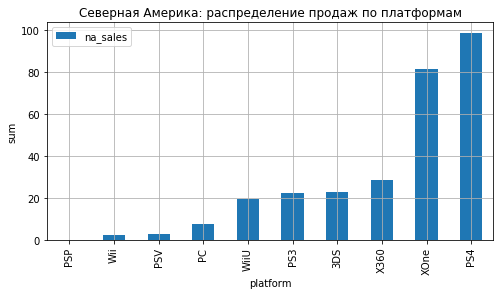

In [63]:
(
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
.sort_values(by='na_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Северная Америка: распределение продаж по платформам')
)
plt.ylabel('sum')

In [64]:
na_top_platform_stat = actual_data.pivot_table(index='platform', values=['na_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
na_top_platform_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
na_top_platform_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
platform,,,,,
PS4,98.61,0.262261,0.05,0.583439,0.340402
XOne,81.27,0.356447,0.10,0.634756,0.402915
X360,28.30,0.254955,0.10,0.396220,0.156991
3DS,22.64,0.106792,0.00,0.440719,0.194233
PS3,22.05,0.100685,0.02,0.227749,0.051870


**Топ-5 популярных платформ в Северной Америке:** PS4, XOne, X360, 3DS, PS3.

Различия в долях продаж между платформами довольно большие. Медианные значения сильно отличаются от средних, вероятно, снова играют роль продажи отдельных игр.

*- Самые популярные жанры (топ-5):*

Text(0, 0.5, 'sum')

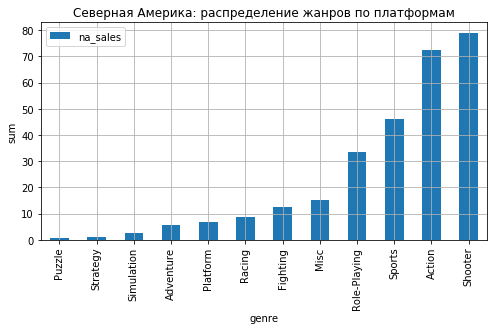

In [65]:
(
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
.sort_values(by='na_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Северная Америка: распределение жанров по платформам')
)
plt.ylabel('sum')

In [66]:
na_top_genre_stat = actual_data.pivot_table(index='genre', values=['na_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
na_top_genre_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
na_top_genre_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
genre,,,,,
Shooter,79.02,0.617344,0.22,0.952457,0.907174
Action,72.53,0.117173,0.01,0.306894,0.094184
Sports,46.13,0.286522,0.07,0.482271,0.232585
Role-Playing,33.47,0.151448,0.02,0.450535,0.202982
Misc,15.05,0.133186,0.01,0.306076,0.093683


**Топ-5 популярных жанров в Северной Америке:** Shooter, Action, Sports, Role-Playing, Misc.

Среднее также сильно отличаются от медианного.

*- Влияет ли рейтинг ESRB на продажи в Северной Америке?*

Text(0, 0.5, 'sum')

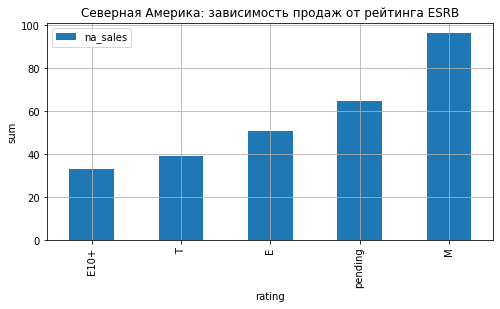

In [67]:
(
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
.sort_values(by='na_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Северная Америка: зависимость продаж от рейтинга ESRB')
)
plt.ylabel('sum')

In [68]:
na_rating_stat = actual_data.pivot_table(index='rating', values=['na_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
na_rating_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
na_rating_stat.sort_values(by='sum', ascending = False)

,sum,mean,median,std,var
rating,,,,,
M,96.42,0.363849,0.12,0.602428,0.362920
pending,64.72,0.086409,0.00,0.420292,0.176646
E,50.74,0.231689,0.05,0.442330,0.195655
T,38.95,0.143727,0.03,0.351066,0.123247
E10+,33.23,0.179622,0.10,0.293740,0.086283


**Вывод:** самые большие продажи у игр с рейтингом «M» — «От 17 лет». Далее по популярности идут игры, рейтинг которых пока не определен, за ними следует «E» — «Для всех», «T» — «Подросткам 13—19 лет» и «E10+» — «Для всех старше 10 лет».

**EU (Европа):**

*- Самые популярные платформы (топ-5):*

Text(0, 0.5, 'sum')

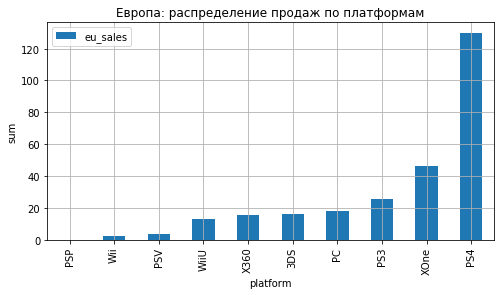

In [69]:
(
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
.sort_values(by='eu_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Европа: распределение продаж по платформам')
)
plt.ylabel('sum')

In [70]:
eu_top_platform_stat = actual_data.pivot_table(index='platform', values=['eu_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
eu_top_platform_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
eu_top_platform_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
platform,,,,,
PS4,130.04,0.345851,0.07,0.815480,0.665008
XOne,46.25,0.202851,0.07,0.371972,0.138363
PS3,25.54,0.116621,0.01,0.334091,0.111617
PC,17.97,0.119007,0.05,0.205325,0.042158
3DS,16.12,0.076038,0.00,0.295478,0.087307


**Топ-5 популярных платформ в Европе:** PS4, XOne, PS3, PC, 3DS.

В отличие от Америки, здесь в рейтинг входит PC, и не входит X360.

Различия в долях продаж между платформами (кроме PS4) не такие большие, как у Северной Америки. Медианные значения также сильно отличаются от средних.

*- Самые популярные жанры (топ-5):*

Text(0, 0.5, 'sum')

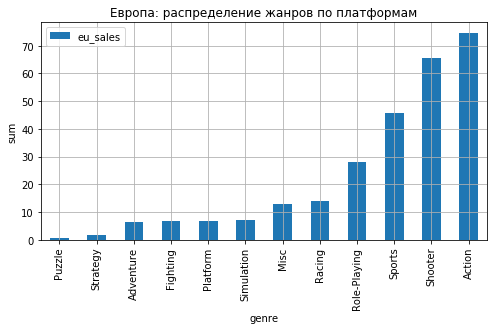

In [71]:
(
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
.sort_values(by='eu_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Европа: распределение жанров по платформам')
)
plt.ylabel('sum')

In [72]:
eu_top_genre_stat = actual_data.pivot_table(index='genre', values=['eu_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
eu_top_genre_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
eu_top_genre_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
genre,,,,,
Action,74.68,0.120646,0.02,0.362598,0.131477
Shooter,65.52,0.511875,0.22,0.814815,0.663924
Sports,45.73,0.284037,0.05,0.824117,0.679169
Role-Playing,28.17,0.127466,0.01,0.393197,0.154604
Racing,14.13,0.204783,0.05,0.390323,0.152352


**Топ-5 популярных жанров в Европе:** Action, Shooter, Sports, Role-Playing, Racing.

В отличие от Америки, в топ не вошел жанр Misc, зато присутствует Racing.

Среднее значение также сильно отличаются от медианного.

*- Влияет ли рейтинг ESRB на продажи в Европе?*

Text(0, 0.5, 'sum')

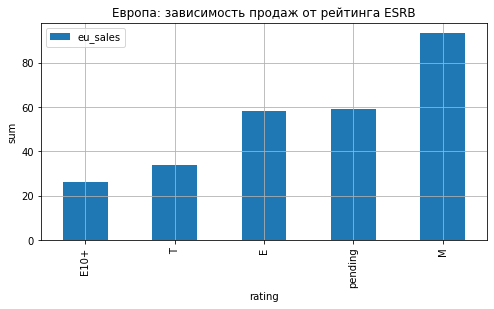

In [73]:
(
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
.sort_values(by='eu_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Европа: зависимость продаж от рейтинга ESRB')
)
plt.ylabel('sum')

In [74]:
eu_rating_stat = actual_data.pivot_table(index='rating', values=['eu_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
eu_rating_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
eu_rating_stat.sort_values(by='sum', ascending = False)

,sum,mean,median,std,var
rating,,,,,
M,93.44,0.352604,0.12,0.648673,0.420777
pending,58.95,0.078705,0.00,0.351015,0.123212
E,58.06,0.265114,0.05,0.735651,0.541183
T,34.07,0.125720,0.04,0.297170,0.088310
E10+,26.16,0.141405,0.09,0.168746,0.028475


**Вывод:** как и в Америке, здесь самые большие продажи у игр с рейтингом «M» — «От 17 лет», далее – игры, рейтинг которых пока не определен, за ними следует «E» — «Для всех», «T» — «Подросткам 13—19 лет» и «E10+» — «Для всех старше 10 лет».

**JP (Япония):**

*- Самые популярные платформы (топ-5):*

Text(0, 0.5, 'sum')

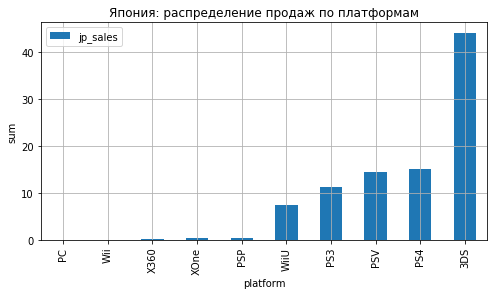

In [75]:
(
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
.sort_values(by='jp_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Япония: распределение продаж по платформам')
)
plt.ylabel('sum')

In [76]:
jp_top_platform_stat = actual_data.pivot_table(index='platform', values=['jp_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
jp_top_platform_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
jp_top_platform_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
platform,,,,,
3DS,44.24,0.208679,0.055,0.529456,0.280323
PS4,15.02,0.039947,0.015,0.067048,0.004495
PSV,14.54,0.049288,0.030,0.074271,0.005516
PS3,11.22,0.051233,0.020,0.079516,0.006323
WiiU,7.31,0.100137,0.010,0.261712,0.068493


**Топ-5 популярных платформ в Японии:** 3DS, PS4, PSV, PS3, WiiU.

В отличие от предыдущих регионов, XOne вообще не входит в топ, зато там есть PSV и WiiU.

Различия в долях продаж между платформами небольшие. Медианные значения не сильно отличаются от средних.

*- Самые популярные жанры (топ-5):*

Text(0, 0.5, 'sum')

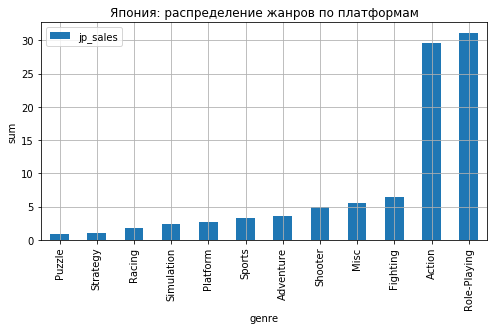

In [77]:
(
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
.sort_values(by='jp_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Япония: распределение жанров по платформам')
)
plt.ylabel('sum')

In [78]:
jp_top_genre_stat = actual_data.pivot_table(index='genre', values=['jp_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
jp_top_genre_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
jp_top_genre_stat.sort_values(by='sum', ascending = False).head()

,sum,mean,median,std,var
genre,,,,,
Role-Playing,31.16,0.140995,0.05,0.421455,0.177624
Action,29.58,0.047787,0.01,0.170689,0.029135
Fighting,6.37,0.106167,0.03,0.327073,0.106977
Misc,5.61,0.049646,0.01,0.114759,0.013170
Shooter,4.87,0.038047,0.00,0.139233,0.019386


**Топ-5 популярных жанров в Японии:** Role-Playing, Action, Fighting, Misc, Shooter.

В отличие от других регионов, здесь первое место по продажам занимает Role-Playing. Не попадает в топ жанр Sports, но зато входит Fighting.

*- Влияет ли рейтинг ESRB на продажи в Японии?*

Text(0, 0.5, 'sum')

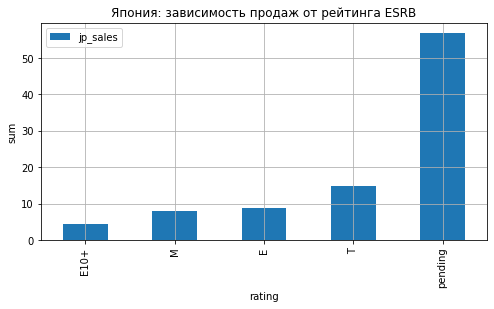

In [79]:
(
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
.sort_values(by='jp_sales')
.plot(kind='bar', grid=True, figsize=(8, 4), title='Япония: зависимость продаж от рейтинга ESRB')
)
plt.ylabel('sum')

In [80]:
jp_rating_stat = actual_data.pivot_table(index='rating', values=['jp_sales'],
                       aggfunc=['sum', 'mean', 'median', 'std', 'var'])
jp_rating_stat.columns = ['sum', 'mean', 'median', 'std', 'var']
jp_rating_stat.sort_values(by='sum', ascending = False)

,sum,mean,median,std,var
rating,,,,,
pending,56.90,0.075968,0.02,0.275849,0.076093
T,14.78,0.054539,0.01,0.178019,0.031691
E,8.94,0.040822,0.00,0.160055,0.025618
M,8.01,0.030226,0.00,0.065810,0.004331
E10+,4.46,0.024108,0.00,0.118937,0.014146


**Вывод:** самые большие продажи у игр без рейтинга. За ними следуют игры с рейтингом «T» — «Подросткам 13—19 лет». Продажи игр с другими рейтингами различается не сильно.

# Шаг 5. Проверка гипотез
<a name='hypothesis_testing'></a>

**Гипотезы:**
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
   
В данном случае нам необходимо сравнить между собой 2 похожие выборки по платформам и по жанрам. 

**Нулевая гипотеза H₀:** исследуемые совокупности равны.

**Альтернативная гипотеза H₁:** исследуемые совокупности не равны.

Это гипотезы о равенстве средних двух генеральных совокупностей, для проверки которых используем метод scipy.stats.ttest_ind.

*Проверим первую гипотезу:*

Прежде сделаем выборку по каждой из платформ методом query(), убрав строки без рейтинга, которые у нас обозначены цифрой "11". Затем сохраним в переменные столбцы с пользовательским рейтингом и проведем тест.

In [81]:
xone = actual_data.query('platform == "XOne" and user_score < 11')
xone_user_score = xone['user_score']

pc = actual_data.query('platform == "PC" and user_score < 11')
pc_user_score = pc['user_score']

alpha = 0.05
results = st.ttest_ind(xone_user_score, pc_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


*Средний пользовательский рейтинг платформы Xbox One:*

In [82]:
xone_user_score.mean().round()

7.0

*Средний пользовательский рейтинг платформы PC:*

In [83]:
pc_user_score.mean().round()

6.0

**Вывод:** мы не можем опровергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Полученное значение p-value говорит о том, что хотя средние рейтинги неодинаковые, с вероятностью в почти 10% такое или большее различие можно получить случайно.

*Проверим вторую гипотезу:*

Так же сначала сделаем выборку по каждому из жанров методом query(), сохраним в переменные столбцы с пользовательским рейтингом и проведем тест.

In [84]:
action = actual_data.query('genre == "Action" and user_score < 11')
action_user_score = action['user_score']

sports = actual_data.query('genre == "Sports" and user_score < 11')
sports_user_score = sports['user_score']

alpha = 0.05
results = st.ttest_ind(action_user_score, sports_user_score)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


*Средний пользовательский рейтинг жанра Action:*

In [85]:
action_user_score.mean().round()

7.0

*Средний пользовательский рейтинг жанра Sports:*

In [86]:
sports_user_score.mean().round()

5.0

**Вывод:** по результатам теста, мы отвергаем нулевую гипотезу. Т.е. у нас есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные.

# Шаг 6. Oбщий вывод
<a name='conclusion'></a>

За период с 1980 по 2016 больше всего игр выпускалось с 2002 (резкий скачок) до 2012 (резкий спад). Активный рост начался с 1994 года. Самые пиковые годы выпуска игр приходятся на 2008-2009 гг.

Платформы с наибольшими суммарными продажами: PS2, X360, PS3.

Примерный срок существования платформ – 10 лет.

Для построения прогнозов на будущее рассматривались данные за период с 2014 по 2016 год.

**Платфомы:**

Платформы с самыми большими сборами за период с 2014 по 2016: PS4, XOne, 3DS, PS3, X360, WiiU, PC, PSV.

Из них потенциально прибыльные платформы - PS4, 3DS, XOne, PC.
Продажи ранее популярных платформ X360 и PS3 начали снижаться. А PS2 в выборку уже не попадает.

Судя по графикам, какие-то отдельные игры продаются чаще других. Это особенно заметно у платформ PS4 и XOne. Также на продажи определенных игр влияет оценка критиков и пользователей. Где-то мнения критиков и пользователей расходятся, например, у игр платформы PC, где больше положительных отзывов критиков. У 3DS среди оценок критиков и пользователей больше положительных. У PS3 и WiiU отзывов мало, и они тоже больше влияют на продажи определенных игр. 

**Жанры:**

Наиболее часто встречающиеся жанры: Action, Role-Playing, Adventure, Sports, Shooter, Misc. 

Наиболее прибыльные жанры: Shooter, Sports, Platform, Fighting, Role-Playing.

Наименее прибыльные жанры: Adventure, Strategy, Puzzle, Simulation.

Наиболее часто встречающиеся жанры на популярных платформах: Action, Role-Playing, Shooter, Sports, Adventure, Misc. Это схоже с общей выборкой.

Наиболее прибыльные жанры на популярных платформах: Shooter, Sports, Role-Playing, Fighting, Platform, Action. В отличие от общей выборки, сюда входит Action.

Наименее прибыльные жанры на популярных платформах: Puzzle, Strategy, Adventure. Эти жанры встречаются и в общей выборке.

Итак, и из общей подборки, и на популярных платформах:

- наиболее часто встречающиеся жанры: Action, Adventure, Role-Playing, Shooter, Sports;
- наиболее прибыльные - Action, Shooter, Role-Playing, Sports;
- наименее прибыльные - Puzzle, Strategy, Adventure.

**Регионы:**

**NA (Северная Америка):**

- Топ-5 популярных платформ в Северной Америке: PS4, XOne, X360, 3DS, PS3.

Различия в долях продаж между платформами довольно большие.

- Топ-5 популярных жанров в Северной Америке: Shooter, Action, Sports, Role-Playing, Misc.


- Рейтинг ESRB: самые большие продажи у игр с рейтингом «M» — «От 17 лет». Далее по популярности идут игры, рейтинг которых пока не определен, за ними следует «E» — «Для всех», «T» — «Подросткам 13—19 лет» и «E10+» — «Для всех старше 10 лет».

**EU (Европа):**

- Топ-5 популярных платформ в Европе: PS4, XOne, PS3, PC, 3DS.

В отличие от Америки, здесь в рейтинг входит PC, и не входит X360.

Различия в долях продаж между платформами (кроме PS4) не такие большие, как у Северной Америки. 

- Топ-5 популярных жанров в Европе: Action, Shooter, Sports, Role-Playing, Racing.

В отличие от Америки, в топ не вошел жанр Misc, зато присутствует Racing.

- Рейтинг ESRB: как и в Америке, здесь самые большие продажи у игр с рейтингом «M» — «От 17 лет», далее – игры, рейтинг которых пока не определен, за ними следует «E» — «Для всех», «T» — «Подросткам 13—19 лет» и «E10+» — «Для всех старше 10 лет».

**JP (Япония):**

- Топ-5 популярных платформ в Японии: 3DS, PS4, PSV, PS3, WiiU.

В отличие от предыдущих регионов, XOne вообще не входит в топ, зато там есть PSV и WiiU.

Различия в долях продаж между платформами небольшие.

- Топ-5 популярных жанров в Японии: Role-Playing, Action, Fighting, Misc, Shooter.

В отличие от других регионов, здесь первое место по продажам занимает Role-Playing. Не попадает в топ жанр Sports, но зато входит Fighting.

- Рейтинг ESRB: самые большие продажи у игр без рейтинга. За ними следуют игры с рейтингом «T» — «Подросткам 13—19 лет». Продажи игр с другими рейтингами различается не сильно.

**Средний пользовательский рейтинг платформ**

Мы не может опровергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Полученное значение p-value говорит о том, что хотя средние рейтинги неодинаковые, с вероятностью в почти 10% такое или большее различие можно получить случайно:

- Xbox One: 7.0
- PC: 6.0

**Средний пользовательский рейтинг жанров**

По результатам теста, мы отвергаем нулевую гипотезу. Т.е. у нас есть основания полагать, что средние пользовательские рейтинги жанров Action и Sports разные:

- Action: 7.0
- Sports: 5.0

**Рекомендации по итогам исследования:**

Особое внимание необходимо обратить на потенциально прибыльные платформы (PS4, 3DS, XOne, PC) и наиболее прибыльные жанры (Shooter, Sports, Platform, Fighting, Role-Playing).

Однако, важно учитывать регион, где будут осуществляться продажи, так как там есть небольшие различия в предпочтениях.